In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import numpy as np
df = pd.read_csv("adult.csv")

In [2]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [4]:
ref = df.income[0]
target = (df.income == ref).astype(int)
data = df.iloc[:,:df.shape[1]-1].drop(columns = ['fnlwgt'])
#data = df.iloc[:,:df.shape[1]-1]

In [5]:
print(ref)

 <=50K


In [6]:
print(np.sum(target),'number of ',ref)
print(len(target) - np.sum(target))

24720 number of   <=50K
7841


In [7]:
categorical = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country']
OE = OrdinalEncoder()
for n in categorical:
    x = OE.fit_transform(data[[n]])
    data[n] = x
    

In [8]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,7.0,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0
1,50,6.0,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0
2,38,4.0,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0
3,53,4.0,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0
4,28,4.0,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0


In [9]:
X_tr, X_ts, y_tr, y_ts = train_test_split(data, target, test_size=0.25)
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_tr,y_tr)
y_pred = model.predict(X_ts)

In [10]:
print(accuracy_score(y_pred,y_ts))
print(X_tr)

0.8482987347991647
       age  workclass  education  education_num  marital_status  occupation  \
27905   36        4.0       15.0             10             0.0         1.0   
19974   32        4.0       15.0             10             4.0         4.0   
26320   45        4.0       15.0             10             2.0         1.0   
9389    31        2.0       11.0              9             0.0         3.0   
30447   66        7.0       11.0              9             6.0        10.0   
...    ...        ...        ...            ...             ...         ...   
17888   32        4.0       11.0              9             4.0         6.0   
15174   27        4.0        9.0             13             4.0        10.0   
21550   24        4.0       15.0             10             2.0        13.0   
30741   62        4.0       11.0              9             2.0         7.0   
31621   66        0.0        6.0              5             2.0         0.0   

       relationship  race  sex  

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')


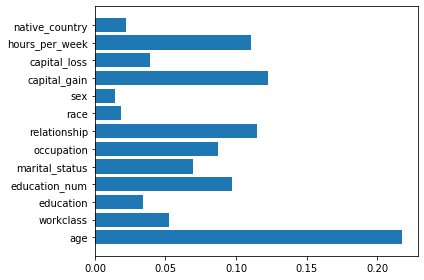

In [11]:
importance = model.feature_importances_
features = data.columns
print(features)
from matplotlib import pyplot as plt
plt.barh(np.arange(importance.size), importance)
plt.yticks(np.arange(importance.size), features)
plt.tight_layout()

In [12]:
df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [13]:
#plt.hist(data.fnlwgt)

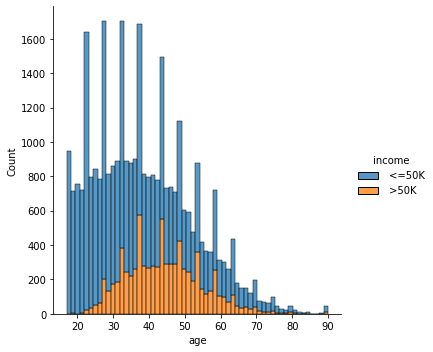

In [14]:
import seaborn as sns
sns.displot(df, x="age", hue="income", multiple="stack")

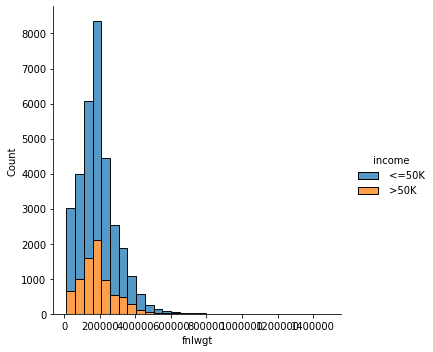

In [15]:
sns.displot(df, x="fnlwgt", hue="income", multiple="stack",bins = 30)

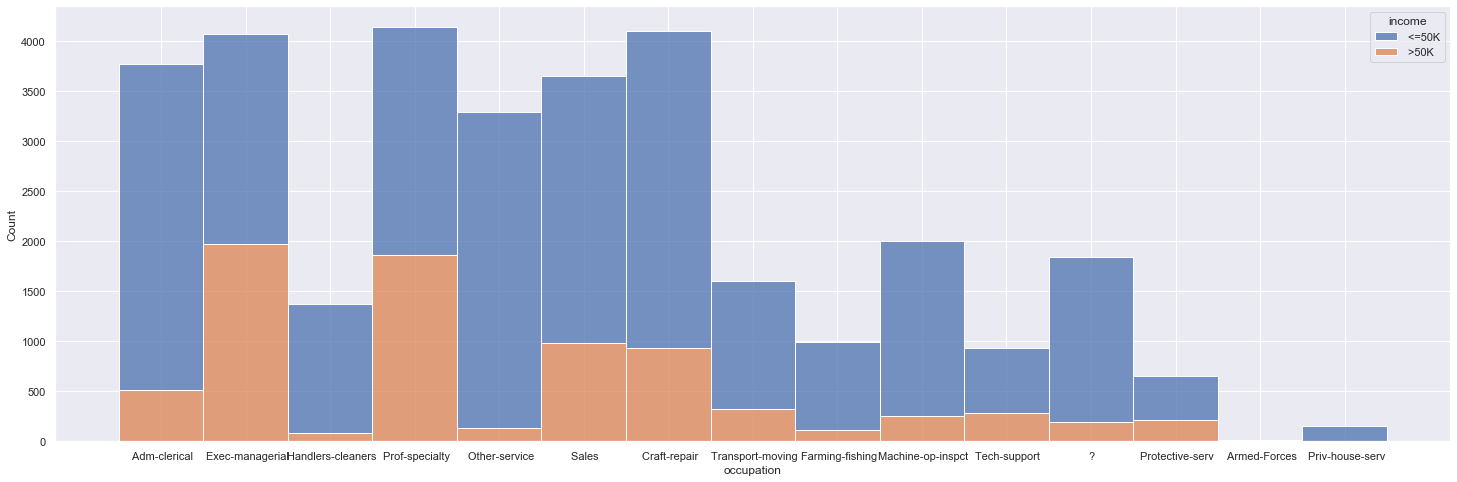

In [16]:
sns.set(rc={'figure.figsize':(25,8)})
sns.histplot(df, x="occupation", hue="income", multiple="stack")


In [17]:
plt.hist(df.occupation[])

SyntaxError: invalid syntax (<ipython-input-17-83a617cb24e0>, line 1)

In [ ]:
df.occupation.unique()

In [ ]:
dd = pd.read_csv('adult_train.csv')

In [ ]:
np.sum(dd.Prof == 1)